# Advanced Analytics and Applications
## Analytics Anacondas 

### Data Collection and Preparation 


In [1]:
# import relevant libaries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import glob 
from vincenty import vincenty
import datetime

import geopandas
import json
# conda install h3-py -c conda-forge
from h3 import h3
from shapely.geometry import shape
from descartes import PolygonPatch

import folium

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# take a look into the data and its structure 
df = pd.read_csv("Data/2019/01/positions_nextbike_bonn_2019_01_28.csv", sep=',')
df.head()

p_rack_locks  p_bike_racks b_state  p_spot  b_active  p_booked_bikes  \
0         False             0      ok   False      True               0   
1         False             0      ok   False      True               0   
2         False             0      ok   False      True               0   
3         False             0      ok   False      True               0   
4         False             0      ok   False      True               0   

   p_place_type             datetime  b_number   trip  ...  b_lock_types  \
0            12  2019-01-28 00:00:00     44728  first  ...    frame_lock   
1            12  2019-01-28 23:59:00     44728   last  ...    frame_lock   
2            12  2019-01-28 00:00:00     44658  first  ...    frame_lock   
3            12  2019-01-28 23:59:00     44658   last  ...    frame_lock   
4            12  2019-01-28 00:00:00     44929  first  ...    frame_lock   

   city  p_number  b_pedelec_battery     p_lng b_boardcomputer  p_maintenance  \
0  bonn         0                  0  7.119859      7551003176          False   
1  bonn         0                  0  7.119811      7551003176          False   
2  bonn         0                  0  7.056917      7551020727          False   
3  bonn         0                  0  7.056791      7551020727          False   
4  bonn         0                  0  7.095922      7551006770          False   

   p_terminal_type p_bike p_bike_types  
0              NaN   True    {"71": 1}  
1              NaN   True    {"71": 1}  
2              NaN   True    {"71": 1}  
3              NaN   True    {"71": 1}  
4              NaN   True    {"71": 1}  

[5 rows x 28 columns]

In [3]:
# explore columns and its meanings 
df.columns

Index(['p_rack_locks', 'p_bike_racks', 'b_state', 'p_spot', 'b_active',
       'p_booked_bikes', 'p_place_type', 'datetime', 'b_number', 'trip',
       'p_uid', 'p_bikes', 'p_lat', 'b_electric_lock', 'b_bike_type', 'p_name',
       'p_free_racks', 'p_address', 'b_lock_types', 'city', 'p_number',
       'b_pedelec_battery', 'p_lng', 'b_boardcomputer', 'p_maintenance',
       'p_terminal_type', 'p_bike', 'p_bike_types'],
      dtype='object')

In [4]:
# TODO table of columns with its meanings 

In [5]:
# show dataframe with columns that might be useful for further analyses and the computation of trip data
df = df[["b_active","p_place_type","datetime","b_number","trip","p_uid","p_bikes","p_lat","p_lng","p_name","city","p_number","p_bike","p_bike_types"]]


In [6]:
df.head(20)

b_active  p_place_type             datetime  b_number   trip     p_uid  \
0       True            12  2019-01-28 00:00:00     44728  first  12238528   
1       True            12  2019-01-28 23:59:00     44728   last  12292496   
2       True            12  2019-01-28 00:00:00     44658  first  12266270   
3       True            12  2019-01-28 23:59:00     44658   last  12266270   
4       True            12  2019-01-28 00:00:00     44929  first  12270065   
5       True            12  2019-01-28 23:59:00     44929   last  12270065   
6       True            12  2019-01-28 00:00:00     44607  first  12271247   
7       True            12  2019-01-28 23:59:00     44607   last  12307708   
8       True            12  2019-01-28 00:00:00     44650  first  12277788   
9       True            12  2019-01-28 23:59:00     44650   last  12277788   
10      True            12  2019-01-28 00:00:00     44647  first  12262294   
11      True            12  2019-01-28 23:23:00     44647  start  12262294   
12      True            12  2019-01-28 23:29:00     44647    end  12308310   
13      True            12  2019-01-28 23:59:00     44647   last  12308310   
14      True             0  2019-01-28 00:00:00     44715  first  10059545   
15      True             0  2019-01-28 23:59:00     44715   last  10059545   
16      True            12  2019-01-28 00:00:00     44931  first  12265758   
17      True            12  2019-01-28 23:59:00     44931   last  12265758   
18      True            12  2019-01-28 00:00:00     44589  first  12272694   
19      True            12  2019-01-28 23:59:00     44589   last  12307495   

    p_bikes      p_lat     p_lng                p_name  city  p_number  \
0         1  50.751664  7.119859            BIKE 44728  bonn         0   
1         1  50.751783  7.119811            BIKE 44728  bonn         0   
2         1  50.748038  7.056917            BIKE 44658  bonn         0   
3         1  50.748084  7.056791            BIKE 44658  bonn         0   
4         1  50.719922  7.095922            BIKE 44929  bonn         0   
5         1  50.719921  7.095809            BIKE 44929  bonn         0   
6         1  50.749891  7.043951            BIKE 44607  bonn         0   
7         1  50.750058  7.043390            BIKE 44607  bonn         0   
8         1  50.725752  7.034684            BIKE 44650  bonn         0   
9         1  50.725879  7.034632            BIKE 44650  bonn         0   
10        1  50.739205  7.073774            BIKE 44647  bonn         0   
11        1  50.739120  7.073766            BIKE 44647  bonn         0   
12        1  50.742764  7.073442            BIKE 44647  bonn         0   
13        1  50.742764  7.073442            BIKE 44647  bonn         0   
14        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
15        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
16        1  50.733943  7.135172            BIKE 44931  bonn         0   
17        1  50.734054  7.135160            BIKE 44931  bonn         0   
18        1  50.712694  7.108828            BIKE 44589  bonn         0   
19        1  50.713889  7.109010            BIKE 44589  bonn         0   

    p_bike p_bike_types  
0     True    {"71": 1}  
1     True    {"71": 1}  
2     True    {"71": 1}  
3     True    {"71": 1}  
4     True    {"71": 1}  
5     True    {"71": 1}  
6     True    {"71": 1}  
7     True    {"71": 1}  
8     True    {"71": 1}  
9     True    {"71": 1}  
10    True    {"71": 1}  
11    True    {"71": 1}  
12    True    {"71": 1}  
13    True    {"71": 1}  
14   False    {"71": 3}  
15   False    {"71": 3}  
16    True    {"71": 1}  
17    True    {"71": 1}  
18    True    {"71": 1}  
19    True    {"71": 1}

In [7]:
df["trip"].unique()

array(['first', 'last', 'start', 'end'], dtype=object)

There are four different values in the trip column [first, last, start, end]. 
At least two values are required to define whether the data set belongs to the starting point or the end of the trip. This means that one trip is represented in two rows in the dataframe. One of the rows contains the values at the starting point (i.e. datetime, start position) and the other row contains the values at the ending point of the trip. 


###### Why are there four values in the trip column? 

Let's have a deeper look in the dataframe and the trip column.

In [8]:
df[(df["trip"] == "first") | (df["trip"] =="last")].head(20)

b_active  p_place_type             datetime  b_number   trip     p_uid  \
0       True            12  2019-01-28 00:00:00     44728  first  12238528   
1       True            12  2019-01-28 23:59:00     44728   last  12292496   
2       True            12  2019-01-28 00:00:00     44658  first  12266270   
3       True            12  2019-01-28 23:59:00     44658   last  12266270   
4       True            12  2019-01-28 00:00:00     44929  first  12270065   
5       True            12  2019-01-28 23:59:00     44929   last  12270065   
6       True            12  2019-01-28 00:00:00     44607  first  12271247   
7       True            12  2019-01-28 23:59:00     44607   last  12307708   
8       True            12  2019-01-28 00:00:00     44650  first  12277788   
9       True            12  2019-01-28 23:59:00     44650   last  12277788   
10      True            12  2019-01-28 00:00:00     44647  first  12262294   
13      True            12  2019-01-28 23:59:00     44647   last  12308310   
14      True             0  2019-01-28 00:00:00     44715  first  10059545   
15      True             0  2019-01-28 23:59:00     44715   last  10059545   
16      True            12  2019-01-28 00:00:00     44931  first  12265758   
17      True            12  2019-01-28 23:59:00     44931   last  12265758   
18      True            12  2019-01-28 00:00:00     44589  first  12272694   
19      True            12  2019-01-28 23:59:00     44589   last  12307495   
20      True            12  2019-01-28 00:00:00     44691  first  12257366   
21      True            12  2019-01-28 23:59:00     44691   last  12257366   

    p_bikes      p_lat     p_lng                p_name  city  p_number  \
0         1  50.751664  7.119859            BIKE 44728  bonn         0   
1         1  50.751783  7.119811            BIKE 44728  bonn         0   
2         1  50.748038  7.056917            BIKE 44658  bonn         0   
3         1  50.748084  7.056791            BIKE 44658  bonn         0   
4         1  50.719922  7.095922            BIKE 44929  bonn         0   
5         1  50.719921  7.095809            BIKE 44929  bonn         0   
6         1  50.749891  7.043951            BIKE 44607  bonn         0   
7         1  50.750058  7.043390            BIKE 44607  bonn         0   
8         1  50.725752  7.034684            BIKE 44650  bonn         0   
9         1  50.725879  7.034632            BIKE 44650  bonn         0   
10        1  50.739205  7.073774            BIKE 44647  bonn         0   
13        1  50.742764  7.073442            BIKE 44647  bonn         0   
14        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
15        3  50.706816  7.033889  Malteser Krankenhaus  bonn      4984   
16        1  50.733943  7.135172            BIKE 44931  bonn         0   
17        1  50.734054  7.135160            BIKE 44931  bonn         0   
18        1  50.712694  7.108828            BIKE 44589  bonn         0   
19        1  50.713889  7.109010            BIKE 44589  bonn         0   
20        1  50.747417  7.125076            BIKE 44691  bonn         0   
21        1  50.747393  7.125176            BIKE 44691  bonn         0   

    p_bike p_bike_types  
0     True    {"71": 1}  
1     True    {"71": 1}  
2     True    {"71": 1}  
3     True    {"71": 1}  
4     True    {"71": 1}  
5     True    {"71": 1}  
6     True    {"71": 1}  
7     True    {"71": 1}  
8     True    {"71": 1}  
9     True    {"71": 1}  
10    True    {"71": 1}  
13    True    {"71": 1}  
14   False    {"71": 3}  
15   False    {"71": 3}  
16    True    {"71": 1}  
17    True    {"71": 1}  
18    True    {"71": 1}  
19    True    {"71": 1}  
20    True    {"71": 1}  
21    True    {"71": 1}

In this filtered dataframe above it gets clear that the examples with the values **first** and **last** in the trip column don't make much sense. Most of the trips in this dataframe have an unlikely long trip duration. The start time of a trip is almost always at 0 AM and the end time of a trip is at 23:59 PM. 
Furthermore the start and the end positions of one trip are nearly the same. 

It could be measurement errors or other data recording procedures. <br> 
These datasets can be disregarded for the next steps, because they aren't suitable for further analyses and they don't represent a real trip.  

Another column which becomes clear is the **p_number**. If the p_number is eqaul to zero then the p_name has a value that contains 'BIKE'. IF the p_number isn't equal to zero then there exists a name for the positon. This indicates that the trip starts or ends at an official bike station. 

In [9]:
# datasets where the duration of a trip is much more meaningful  
df[(df["trip"] == "start") | (df["trip"] =="end")].head(20)

b_active  p_place_type             datetime  b_number   trip     p_uid  \
11      True            12  2019-01-28 23:23:00     44647  start  12262294   
12      True            12  2019-01-28 23:29:00     44647    end  12308310   
27      True            12  2019-01-28 09:37:00     44795  start  12233021   
28      True            12  2019-01-28 09:47:00     44795    end  12292170   
35      True            12  2019-01-28 08:47:00     44719  start  12276651   
36      True            12  2019-01-28 09:00:00     44719    end  12291350   
37      True            12  2019-01-28 09:07:00     44719  start  12291350   
38      True            12  2019-01-28 09:39:00     44719    end  12292023   
39      True            12  2019-01-28 16:43:00     44719  start  12294951   
40      True            12  2019-01-28 16:52:00     44719    end  12300675   
41      True            12  2019-01-28 18:27:00     44719  start  12300675   
42      True            12  2019-01-28 18:31:00     44719    end  12303153   
43      True            12  2019-01-28 21:23:00     44719  start  12305396   
44      True            12  2019-01-28 21:34:00     44719    end  12306605   
45      True            12  2019-01-28 21:51:00     44719  start  12306605   
46      True            12  2019-01-28 21:56:00     44719    end  12306978   
49      True             0  2019-01-28 14:46:00     44549  start  10058493   
50      True            12  2019-01-28 14:57:00     44549    end  12298002   
65      True            12  2019-01-28 01:06:00     44921  start  12283049   
66      True            12  2019-01-28 01:12:00     44921    end  12284986   

    p_bikes      p_lat     p_lng      p_name  city  p_number  p_bike  \
11        1  50.739120  7.073766  BIKE 44647  bonn         0    True   
12        1  50.742764  7.073442  BIKE 44647  bonn         0    True   
27        1  50.691034  7.130670  BIKE 44795  bonn         0    True   
28        1  50.686653  7.159832  BIKE 44795  bonn         0    True   
35        1  50.743868  7.079610  BIKE 44719  bonn         0    True   
36        1  50.724698  7.087712  BIKE 44719  bonn         0    True   
37        1  50.724698  7.087712  BIKE 44719  bonn         0    True   
38        1  50.724831  7.087654  BIKE 44719  bonn         0    True   
39        1  50.724819  7.087713  BIKE 44719  bonn         0    True   
40        1  50.718751  7.107172  BIKE 44719  bonn         0    True   
41        1  50.719002  7.107208  BIKE 44719  bonn         0    True   
42        1  50.721124  7.102313  BIKE 44719  bonn         0    True   
43        1  50.719947  7.102898  BIKE 44719  bonn         0    True   
44        1  50.735596  7.086045  BIKE 44719  bonn         0    True   
45        1  50.735596  7.086045  BIKE 44719  bonn         0    True   
46        1  50.732947  7.081889  BIKE 44719  bonn         0    True   
49        1  50.732863  7.083832  Karlstraße  bonn      4879   False   
50        1  50.726031  7.098794  BIKE 44549  bonn         0    True   
65        1  50.763442  7.055784  BIKE 44921  bonn         0    True   
66        1  50.755129  7.069852  BIKE 44921  bonn         0    True   

   p_bike_types  
11    {"71": 1}  
12    {"71": 1}  
27    {"71": 1}  
28    {"71": 1}  
35    {"71": 1}  
36    {"71": 1}  
37    {"71": 1}  
38    {"71": 1}  
39    {"71": 1}  
40    {"71": 1}  
41    {"71": 1}  
42    {"71": 1}  
43    {"71": 1}  
44    {"71": 1}  
45    {"71": 1}  
46    {"71": 1}  
49    {"71": 1}  
50    {"71": 1}  
65    {"71": 1}  
66    {"71": 1}

A trip consists of two successive datasets. The first contains the values at the start and the second dataset contains the values at the ending point of the trip. In the next steps we can join these datasets to one dataset, so that a trip is represented in just one dataset with features about the start and end time and the start and end location as well. 

In [10]:
# read in the availabe data for every month and day 
df = pd.DataFrame()

#read in files for each month 
# for i in range(1,13): 
#     if i <10: 
#         #read in files for each day
#         for i in glob.glob("Data/2019/0" + str(i) +"/*.csv"):     
#             df_1 = pd.read_csv(i, sep=',')
#             df = pd.concat([df, df_1],axis=0)    # concatenate to one dateframe     
#     else: 
#         #read in files for each day
#         for i in glob.glob("Data/2019/" + str(i) +"/*.csv"):     
#             df_1 = pd.read_csv(i, sep=',')
#             df = pd.concat([df, df_1],axis=0)    # concatenate to one dateframe     

# df.reset_index(drop=True,inplace=True)
# df.to_csv("Data/compressedRawData.csv")

df = pd.read_csv("Data/compressedRawData.csv", index_col=0)


In [11]:
# there are more "start" than "end" datasets 
df["trip"].value_counts()

start    1073109
end      1049372
last      237025
first     236756
Name: trip, dtype: int64

In [12]:
# check, if the next dataset belongs to the current dataset 
# this means that they build a pair for one trip
# if they have the same trip type, we want to delete them 
deletionFilter = df["trip"] != df["trip"].shift(-1)

In [13]:
# apply the filter 
df = df[deletionFilter]
df.groupby("trip").count() 
# the number of datasets for trip types: ("start"/"end") is equal now 
# after merging these to trip data, we have to get 1049372 trips in our final dataframe

b_active  b_battery_pack  b_bike_type  b_boardcomputer  \
trip                                                            
end     1049372             347      1049372          1049372   
first    236686              62       236686           236686   
last     237025              59       237025           237025   
start   1049372             364      1049372          1049372   

       b_electric_lock  b_lock_types  b_number  b_pedelec_battery  b_state  \
trip                                                                         
end            1049372       1049372   1049372             118382  1049372   
first           236686        236686    236686              36318   236686   
last            237025        237025    237025              35976   237025   
start          1049372       1049372   1049372             118414  1049372   

          city  ...    p_lng  p_maintenance   p_name  p_number  p_place_type  \
trip            ...                                                            
end    1049372  ...  1049372        1049372  1049372   1049220       1049372   
first   236686  ...   236686         236686   236686    236685        236686   
last    237025  ...   237025         237025   237025    237024        237025   
start  1049372  ...  1049372        1049372  1049372   1049212       1049372   

       p_rack_locks  p_special_racks   p_spot  p_terminal_type    p_uid  
trip                                                                     
end         1049372           839769  1049372            46822  1049372  
first        236686           176715   236686            11018   236686  
last         237025           177473   237025             7312   237025  
start       1049372           840065  1049372            58292  1049372  

[4 rows x 30 columns]

In [14]:
# function that gets the raw data and returns the final trip data 
def get_df_final_trips(p_df): 
    
    # discard values 'first' & 'last' in trip column 
    p_df = p_df[(p_df["trip"] == "start") | (p_df["trip"]=="end")]
    
    # select useful columns for further analyses 
    # if neccessary we can add some more columns here 
    p_df = p_df[["p_place_type","datetime","b_number","trip","p_uid","p_bikes","p_lat","p_lng",
            "p_name","p_number","p_bike","p_spot"]]
    
    # split data into two dataframes 
    df_start = p_df[(p_df["trip"] == "start")] 
    df_end = p_df[(p_df["trip"] == "end")]

    # reset indexes to get current indexes as a further column 
    df_start.reset_index(inplace=True)
    df_end.reset_index(inplace=True)
    
    # rename columns for clarity after merging
    df_start.rename(columns={"index":"index_start",
                         "p_place_type":"p_place_type_start",
                         "datetime":"datetime_start",
                         "b_number":"b_number_start",
                         "trip":"trip_start",
                         "p_uid":"p_uid_start",
                         "p_bikes":"p_bikes",
                         "p_lat":"latitude_start",
                         "p_lng":"longitude_start",
                         "p_name":"p_name_start",
                         "p_number":"p_number_start",
                         "p_bike":"p_bike_start",
                         "p_spot":"p_spot_start"},                         
                inplace=True)

    df_end.rename(columns={"index":"index_end",
                         "p_place_type":"p_place_type_end",
                         "datetime":"datetime_end",
                         "b_number":"b_number_end",
                         "trip":"trip_end",
                         "p_uid":"p_uid_end",
                         "p_bikes":"p_bikes",
                         "p_lat":"latitude_end",
                         "p_lng":"longitude_end",
                         "p_name":"p_name_end",
                         "p_number":"p_number_end",
                         "p_bike":"p_bike_end",
                         "p_spot":"p_spot_end"},
                inplace=True)

    # a trip consists of two successive datasets
    # decrement index_end for merging with index_start
    df_end["index_end"] = df_end["index_end"]-1
    
    # merge the two dataframes to one 
    # the result is the dataframe that contains one trip per row
    final_trips = pd.merge(df_start,df_end,left_on="index_start", right_on="index_end")
    
    return final_trips

In [15]:
# save final trip data
final_trips = get_df_final_trips(df)

In [16]:
# as described before, we get 1049372 datasets 
final_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049372 entries, 0 to 1049371
Data columns (total 26 columns):
index_start           1049372 non-null int64
p_place_type_start    1049372 non-null int64
datetime_start        1049372 non-null object
b_number_start        1049372 non-null int64
trip_start            1049372 non-null object
p_uid_start           1049372 non-null int64
p_bikes_x             1049372 non-null int64
latitude_start        1049372 non-null float64
longitude_start       1049372 non-null float64
p_name_start          1049372 non-null object
p_number_start        1049212 non-null float64
p_bike_start          1049372 non-null bool
p_spot_start          1049372 non-null bool
index_end             1049372 non-null int64
p_place_type_end      1049372 non-null int64
datetime_end          1049372 non-null object
b_number_end          1049372 non-null int64
trip_end              1049372 non-null object
p_uid_end             1049372 non-null int64
p_bikes_y             1

In [17]:
# would not make sense, if bike id is not equal at start and end location
final_trips[final_trips["b_number_start"] != final_trips["b_number_end"]]

Empty DataFrame
Columns: [index_start, p_place_type_start, datetime_start, b_number_start, trip_start, p_uid_start, p_bikes_x, latitude_start, longitude_start, p_name_start, p_number_start, p_bike_start, p_spot_start, index_end, p_place_type_end, datetime_end, b_number_end, trip_end, p_uid_end, p_bikes_y, latitude_end, longitude_end, p_name_end, p_number_end, p_bike_end, p_spot_end]
Index: []

[0 rows x 26 columns]

In [18]:
# would not make sense, if start time is later than end time of the trip
final_trips[final_trips["datetime_start"] > final_trips["datetime_end"]]

Empty DataFrame
Columns: [index_start, p_place_type_start, datetime_start, b_number_start, trip_start, p_uid_start, p_bikes_x, latitude_start, longitude_start, p_name_start, p_number_start, p_bike_start, p_spot_start, index_end, p_place_type_end, datetime_end, b_number_end, trip_end, p_uid_end, p_bikes_y, latitude_end, longitude_end, p_name_end, p_number_end, p_bike_end, p_spot_end]
Index: []

[0 rows x 26 columns]

In [19]:
final_trips.head(10)

index_start  p_place_type_start       datetime_start  b_number_start  \
0            3                  12  2019-01-20 03:20:00           44952   
1            5                  12  2019-01-20 11:51:00           44952   
2            7                  12  2019-01-20 14:32:00           44952   
3           15                  12  2019-01-20 02:21:00           44715   
4           17                  12  2019-01-20 10:50:00           44715   
5           19                  12  2019-01-20 13:25:00           44715   
6           21                  12  2019-01-20 18:33:00           44715   
7           25                  12  2019-01-20 03:08:00           44931   
8           29                  12  2019-01-20 13:23:00           44589   
9           31                  12  2019-01-20 16:40:00           44589   

  trip_start  p_uid_start  p_bikes_x  latitude_start  longitude_start  \
0      start     12040694          1       50.703284         7.154586   
1      start     12102064          1       50.716753         7.160890   
2      start     12112947          1       50.737916         7.112345   
3      start     12099152          1       50.752700         7.089911   
4      start     12101268          1       50.740355         7.097171   
5      start     12109135          1       50.733538         7.086750   
6      start     12112113          1       50.729842         7.097790   
7      start     12093216          1       50.747953         7.119311   
8      start     12094258          1       50.733517         7.100314   
9      start     12115750          1       50.733698         7.100065   

  p_name_start  ...  b_number_end  trip_end  p_uid_end  p_bikes_y  \
0   BIKE 44952  ...         44952       end   12102064          1   
1   BIKE 44952  ...         44952       end   10059156          2   
2   BIKE 44952  ...         44952       end   10044296          1   
3   BIKE 44715  ...         44715       end   12101268          1   
4   BIKE 44715  ...         44715       end   12109135          1   
5   BIKE 44715  ...         44715       end   12112113          1   
6   BIKE 44715  ...         44715       end   12118255          1   
7   BIKE 44931  ...         44931       end   12115375          1   
8   BIKE 44589  ...         44589       end   12094258          1   
9   BIKE 44589  ...         44589       end   12116372          1   

   latitude_end longitude_end          p_name_end p_number_end  p_bike_end  \
0     50.716569      7.160905          BIKE 44952          0.0        True   
1     50.737971      7.113851    Hans-Steger-Ufer       4890.0       False   
2     50.714610      7.160082  Bahnhof Oberkassel       4743.0       False   
3     50.740347      7.097133          BIKE 44715          0.0        True   
4     50.733742      7.086432          BIKE 44715          0.0        True   
5     50.729742      7.097689          BIKE 44715          0.0        True   
6     50.720507      7.087529          BIKE 44715          0.0        True   
7     50.747769      7.119867          BIKE 44931          0.0        True   
8     50.733517      7.100314          BIKE 44589          0.0        True   
9     50.719133      7.108649          BIKE 44589          0.0        True   

   p_spot_end  
0       False  
1        True  
2        True  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False  

[10 rows x 26 columns]

In [20]:
# check missing values 
final_trips.isna().any(axis=0)

index_start           False
p_place_type_start    False
datetime_start        False
b_number_start        False
trip_start            False
p_uid_start           False
p_bikes_x             False
latitude_start        False
longitude_start       False
p_name_start          False
p_number_start         True
p_bike_start          False
p_spot_start          False
index_end             False
p_place_type_end      False
datetime_end          False
b_number_end          False
trip_end              False
p_uid_end             False
p_bikes_y             False
latitude_end          False
longitude_end         False
p_name_end            False
p_number_end           True
p_bike_end            False
p_spot_end            False
dtype: bool

In [21]:
# converting objects to datetimes
final_trips["datetime_start"] = pd.to_datetime(final_trips["datetime_start"])
final_trips["datetime_end"] = pd.to_datetime(final_trips["datetime_end"])

# adding the trip duration with the difference of start and end time
final_trips["trip_duration"] = final_trips["datetime_end"] - final_trips["datetime_start"]

#converting timedelta to numeric and format in minutes 
final_trips["trip_duration"] = pd.to_numeric(final_trips["trip_duration"] / 60000000000)

## adding the weekday of the start time of a trip; stored in integers (0: monday, 6:sunday)
final_trips['weekday'] = final_trips['datetime_start'].dt.dayofweek

# adding the distance between start and end position
final_trips["distance"] = final_trips[["latitude_start","longitude_start","latitude_end","longitude_end"]].apply(
    lambda x: vincenty([x[0], x[1]],
                       [x[2], x[3]]),axis=1)

In [22]:
# function which returns True for saturday and sunday; otherwise it returns False
def isWeekend(index_of_day): 
    if index_of_day > 4: 
        return 1 
    else: 
        return 0

In [23]:
# adding new boolean column "weekend"    
final_trips["weekend"] = final_trips["weekday"].apply(lambda x: isWeekend(x))

# transform column "datatime_start" into several columns 
final_trips["day"] = final_trips["datetime_start"].apply(lambda x: x.day)
final_trips["month"] = final_trips["datetime_start"].apply(lambda x: x.month)
final_trips["hour"] = final_trips["datetime_start"].apply(lambda x: x.hour)
final_trips["minute"] = final_trips["datetime_start"].apply(lambda x: x.minute)

In [27]:
# checking for Nan values in the columns
final_trips.isna().any(axis=0)

index_start           False
p_place_type_start    False
datetime_start        False
b_number_start        False
trip_start            False
p_uid_start           False
p_bikes_x             False
latitude_start        False
longitude_start       False
p_name_start          False
p_number_start         True
p_bike_start          False
p_spot_start          False
index_end             False
p_place_type_end      False
datetime_end          False
b_number_end          False
trip_end              False
p_uid_end             False
p_bikes_y             False
latitude_end          False
longitude_end         False
p_name_end            False
p_number_end           True
p_bike_end            False
p_spot_end            False
trip_duration         False
weekday               False
distance              False
weekend               False
day                   False
month                 False
hour                  False
minute                False
idle_time             False
dtype: bool

####  Adding a column for the idle time of the bikes between trips

In [25]:
def idle_time(df):
    #'''calculates the idle times of the bikes between trips'''
    
    #adding column for the idle time
    df["idle_time"] = ''
    
    #groupby bike
    by_bike = df.groupby('b_number_start')

    all_idle_times = []
    #split by groups   
    for bike in by_bike.groups:
        this_bike = by_bike.get_group(bike)
        this_bike = this_bike.reset_index()
        #make sure that the group is sorted by datetime_start
        this_bike.sort_values(by=['datetime_start'], inplace=True)

        #loop through each row(trip) and calculate idle time between consecutive trips
        for i in range(len(this_bike.index) - 1): 
            #select end time
            end_time = this_bike.at[i, "datetime_end"]
            #select start time
            start_time = this_bike.at[i + 1, "datetime_start"]
            #calculate idle time in minutes
            idle_time = start_time - end_time
            idle_time = idle_time.total_seconds()/60
            #save the idle time in the respective row of the trip
            this_bike.at[i,'idle_time'] = idle_time
            
        #save the dataframe for one bike in the list 'all_idle_times'   
        all_idle_times.append(this_bike)

    return all_idle_times


In [28]:
#Creates list containing the dataframes per bike (b_number_start)
idle_times_per_bike = idle_time(final_trips)

In [29]:
#Checking if the Length of the list equals the amount of different b_number_start which exist in the 'final_trips' dataframe
print(final_trips['b_number_start'].nunique() == len(idle_times_per_bike))

True


In [30]:
#Create one dataframe by concatenating the dataframes per bike
final_trips = pd.concat(idle_times_per_bike)

In [31]:
#Changing data type of 'idle_time' from object to numeric
final_trips['idle_time'] = pd.to_numeric(final_trips['idle_time'], errors='coerce').fillna(0, downcast='infer')

In [32]:
#Checking for negative idle times
final_trips[final_trips['idle_time'] < 0]

Empty DataFrame
Columns: [index, index_start, p_place_type_start, datetime_start, b_number_start, trip_start, p_uid_start, p_bikes_x, latitude_start, longitude_start, p_name_start, p_number_start, p_bike_start, p_spot_start, index_end, p_place_type_end, datetime_end, b_number_end, trip_end, p_uid_end, p_bikes_y, latitude_end, longitude_end, p_name_end, p_number_end, p_bike_end, p_spot_end, trip_duration, weekday, distance, weekend, day, month, hour, minute, idle_time]
Index: []

[0 rows x 36 columns]

In [33]:
#Sort final dataframe by 'datetime_start' instead of the bike number
final_trips.sort_values(by=['datetime_start'], inplace=True)

In [34]:
final_trips.head()

index  index_start  p_place_type_start      datetime_start  b_number_start  \
0    323         1089                  12 2019-01-20 00:04:00           44765   
0    489         1666                  12 2019-01-20 00:10:00           44638   
0    316         1061                  12 2019-01-20 00:10:00           44666   
0    220          715                  12 2019-01-20 00:11:00           44965   
0    110          379                  12 2019-01-20 00:12:00           44883   

  trip_start  p_uid_start  p_bikes_x  latitude_start  longitude_start  ...  \
0      start     12098879          1       50.732120         7.095427  ...   
0      start     12099258          1       50.724813         7.135803  ...   
0      start     12093865          1       50.737367         7.100229  ...   
0      start     12095087          1       50.740329         7.068645  ...   
0      start     12096795          1       50.737573         7.101451  ...   

  p_spot_end  trip_duration  weekday  distance  weekend  day month  hour  \
0      False              9        6  1.102344        1   20     1     0   
0      False             11        6  2.011820        1   20     1     0   
0      False              6        6  0.102004        1   20     1     0   
0      False             10        6  1.560051        1   20     1     0   
0      False              5        6  0.000000        1   20     1     0   

  minute  idle_time  
0      4        486  
0     10        203  
0     10          2  
0     11       1256  
0     12         14  

[5 rows x 36 columns]

In [35]:
final_trips['idle_time'].mean()

370.16967481503224

In [36]:
final_trips['idle_time'].max()

442852

In [37]:
final_trips['idle_time'].min()

0

## Adding weather data
#### Which weather station is suitable as the data source for different weather features?

<i> Deutscher Wetterdienst </i> has several weather stations in Germany, which can be looked up [here](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/TU_Stundenwerte_Beschreibung_Stationen.txt)

There are 5 weather stations in and around the city of Bonn. Unfortunately the stations in Bonn don't supply data for the year 2019. 

<img src='Data/bonn.jpg'/>

We have to check which of the remaining stations are closer to the city center of Bonn. For this we can use the functions of the libary <i> vincenty <i/>.

In [38]:
# distance in kilometers from Köln-Bonn to Bonn city center 
vincenty([50.8646,7.1575],[50.7285,7.0839])

16.004915

In [39]:
# distance in kilometers from Königswinter-Heiderhof to Bonn city center 
vincenty([50.7290,7.2047],[50.7285,7.0839])

8.529407

Königswinter-Heiderhof is closer to the city center of Bonn. 

#### Reading the weather data for Königswinter-Heiderhof

In [40]:
# read in temperature data for 2019, select useful columns
temp = pd.read_csv("Data/Temperature.txt", sep = ";")
temp.rename(columns = {"TT_TU":"temperature °C", "MESS_DATUM":"datetime", "RF_TU": "relative_humidity"}, inplace=True)
temp.drop(labels=["STATIONS_ID", "QN_9", "eor"], axis=1, inplace=True)
temp = temp[(temp["datetime"] >= 2019010100) & (temp["datetime"] <= 2019123123)]
temp.reset_index(drop=True, inplace=True)
temp

datetime  temperature °C  relative_humidity
0     2019010100             7.6               94.0
1     2019010101             7.5               93.0
2     2019010102             7.4               92.0
3     2019010103             7.5               85.0
4     2019010104             6.8               94.0
...          ...             ...                ...
8755  2019123119             0.8               99.0
8756  2019123120             1.3               99.0
8757  2019123121             0.7               99.0
8758  2019123122             0.6              100.0
8759  2019123123             1.1               95.0

[8760 rows x 3 columns]

In [41]:
# read in precipitation data for 2019, select useful columns
# Köln Bonn used, because the data for precipitation in Königswinter is not completely for 2019
precipitation = pd.read_csv("Data/Precipitation.txt", sep = ";")
precipitation.rename(columns = {"  R1":"precipitaion_level (mm)", "MESS_DATUM":"datetime", "RS_IND": "precipitation y/n"}, inplace=True)
precipitation.drop(labels=["STATIONS_ID", "QN_8", "eor","WRTR"], axis=1, inplace=True)
precipitation = precipitation[(precipitation["datetime"] >= 2019010100) & (precipitation["datetime"] <= 2019123123)]
precipitation.reset_index(drop=True, inplace=True)
precipitation

datetime  precipitaion_level (mm)  precipitation y/n
0     2019010100                      0.0                  0
1     2019010101                      0.0                  0
2     2019010102                      0.0                  0
3     2019010103                      0.0                  1
4     2019010104                      0.0                  1
...          ...                      ...                ...
8755  2019123119                      0.0                  0
8756  2019123120                      0.0                  0
8757  2019123121                      0.0                  0
8758  2019123122                      0.0                  0
8759  2019123123                      0.0                  0

[8760 rows x 3 columns]

In [42]:
# read in wind data for 2019, select useful columns
# data for 36 hours missing (result = 8723 rows instead of 8760)
wind = pd.read_csv("Data/Wind.txt", sep = ";")
wind.rename(columns = {"   F":"average_wind_speed (m/s)", "MESS_DATUM":"datetime"}, inplace=True)
wind.drop(labels=["STATIONS_ID", "QN_3", "eor","   D"], axis=1, inplace=True)
wind = wind[(wind["datetime"] >= 2019010100) & (wind["datetime"] <= 2019123123)]
wind.reset_index(drop=True, inplace=True)
wind

datetime  average_wind_speed (m/s)
0     2019010100                       1.8
1     2019010101                       2.0
2     2019010102                       2.4
3     2019010103                       3.3
4     2019010104                       3.3
...          ...                       ...
8718  2019123119                       1.1
8719  2019123120                       1.5
8720  2019123121                       1.5
8721  2019123122                       1.3
8722  2019123123                       1.5

[8723 rows x 2 columns]

In [43]:
# concatenate and merge weather data to final dateframe 
weather = pd.concat([temp, precipitation.drop("datetime",axis=1)],axis=1)
weather = pd.merge(weather, wind,on="datetime",how="left")

# wind data for 36 hours missing (result = 8723 rows instead of 8760)
weather.isna().any(axis=0)

datetime                    False
temperature °C              False
relative_humidity           False
precipitaion_level (mm)     False
precipitation y/n           False
average_wind_speed (m/s)     True
dtype: bool

In [44]:
weather.to_csv("Data/final_weather.csv")
weather

datetime  temperature °C  relative_humidity  precipitaion_level (mm)  \
0     2019010100             7.6               94.0                      0.0   
1     2019010101             7.5               93.0                      0.0   
2     2019010102             7.4               92.0                      0.0   
3     2019010103             7.5               85.0                      0.0   
4     2019010104             6.8               94.0                      0.0   
...          ...             ...                ...                      ...   
8755  2019123119             0.8               99.0                      0.0   
8756  2019123120             1.3               99.0                      0.0   
8757  2019123121             0.7               99.0                      0.0   
8758  2019123122             0.6              100.0                      0.0   
8759  2019123123             1.1               95.0                      0.0   

      precipitation y/n  average_wind_speed (m/s)  
0                     0                       1.8  
1                     0                       2.0  
2                     0                       2.4  
3                     1                       3.3  
4                     1                       3.3  
...                 ...                       ...  
8755                  0                       1.1  
8756                  0                       1.5  
8757                  0                       1.5  
8758                  0                       1.3  
8759                  0                       1.5  

[8760 rows x 6 columns]

In [45]:
def formatDatetimeForMerging(x):
    # return as integer for merging 
    return int(x[:13].replace('-','').replace(' ',''))

In [46]:
final_trips["datetime_start_for_merge_with_data"] = final_trips["datetime_start"].apply(lambda x: formatDatetimeForMerging(str(x)))


In [47]:
# final dataframe, trips with weather data 
trips_weather = pd.merge(final_trips, weather, left_on="datetime_start_for_merge_with_data", right_on="datetime")

In [48]:
trips_weather.head(10)

index  index_start  p_place_type_start      datetime_start  b_number_start  \
0    323         1089                  12 2019-01-20 00:04:00           44765   
1    489         1666                  12 2019-01-20 00:10:00           44638   
2    316         1061                  12 2019-01-20 00:10:00           44666   
3    220          715                  12 2019-01-20 00:11:00           44965   
4    110          379                  12 2019-01-20 00:12:00           44883   
5    276          921                  12 2019-01-20 00:12:00           44706   
6    120          405                  12 2019-01-20 00:12:00           44500   
7    170          557                  12 2019-01-20 00:14:00           44642   
8    207          683                  12 2019-01-20 00:14:00           44608   
9     64          213                  12 2019-01-20 00:15:00           44723   

  trip_start  p_uid_start  p_bikes_x  latitude_start  longitude_start  ...  \
0      start     12098879          1       50.732120         7.095427  ...   
1      start     12099258          1       50.724813         7.135803  ...   
2      start     12093865          1       50.737367         7.100229  ...   
3      start     12095087          1       50.740329         7.068645  ...   
4      start     12096795          1       50.737573         7.101451  ...   
5      start     12090662          1       50.732004         7.095190  ...   
6      start     12099188          1       50.732351         7.095497  ...   
7      start     12095397          1       50.731698         7.092452  ...   
8      start     12098973          1       50.722742         7.087852  ...   
9      start     12089154          1       50.737088         7.103781  ...   

  hour  minute  idle_time  datetime_start_for_merge_with_data    datetime  \
0    0       4        486                          2019012000  2019012000   
1    0      10        203                          2019012000  2019012000   
2    0      10          2                          2019012000  2019012000   
3    0      11       1256                          2019012000  2019012000   
4    0      12         14                          2019012000  2019012000   
5    0      12         13                          2019012000  2019012000   
6    0      12       2405                          2019012000  2019012000   
7    0      14        184                          2019012000  2019012000   
8    0      14        876                          2019012000  2019012000   
9    0      15          1                          2019012000  2019012000   

   temperature °C relative_humidity  precipitaion_level (mm)  \
0            -4.1              82.0                      0.0   
1            -4.1              82.0                      0.0   
2            -4.1              82.0                      0.0   
3            -4.1              82.0                      0.0   
4            -4.1              82.0                      0.0   
5            -4.1              82.0                      0.0   
6            -4.1              82.0                      0.0   
7            -4.1              82.0                      0.0   
8            -4.1              82.0                      0.0   
9            -4.1              82.0                      0.0   

  precipitation y/n  average_wind_speed (m/s)  
0                 0                       2.5  
1                 0                       2.5  
2                 0                       2.5  
3                 0                       2.5  
4                 0                       2.5  
5                 0                       2.5  
6                 0                       2.5  
7                 0                       2.5  
8                 0                       2.5  
9                 0                       2.5  

[10 rows x 43 columns]

In [49]:
trips_weather.drop(["datetime_start_for_merge_with_data","datetime"], axis=1, inplace=True)

In [50]:
# Saving dataframe which contains trip and weather data
trips_weather.to_csv("Data/final_trips_and_weather.csv")

In [85]:
df_bonn = pd.read_csv("Data/final_trips_and_weather.csv", sep=',',index_col=0)

## H3 - Hierarchical Discretization with Hexagons

In [86]:
#creating geopandas dataframe from df_bonn by adding geometry column to dataframe
gdf_bonn = geopandas.GeoDataFrame(
    df_bonn, geometry=geopandas.points_from_xy(df_bonn.longitude_start, df_bonn.latitude_start))

In [87]:
gdf_bonn.head(5)

index  index_start  p_place_type_start       datetime_start  \
0    323         1089                  12  2019-01-20 00:04:00   
1    489         1666                  12  2019-01-20 00:10:00   
2    316         1061                  12  2019-01-20 00:10:00   
3    220          715                  12  2019-01-20 00:11:00   
4    110          379                  12  2019-01-20 00:12:00   

   b_number_start trip_start  p_uid_start  p_bikes_x  latitude_start  \
0           44765      start     12098879          1       50.732120   
1           44638      start     12099258          1       50.724813   
2           44666      start     12093865          1       50.737367   
3           44965      start     12095087          1       50.740329   
4           44883      start     12096795          1       50.737573   

   longitude_start  ... month  hour  minute  idle_time  temperature °C  \
0         7.095427  ...     1     0       4        486            -4.1   
1         7.135803  ...     1     0      10        203            -4.1   
2         7.100229  ...     1     0      10          2            -4.1   
3         7.068645  ...     1     0      11       1256            -4.1   
4         7.101451  ...     1     0      12         14            -4.1   

   relative_humidity precipitaion_level (mm)  precipitation y/n  \
0               82.0                     0.0                  0   
1               82.0                     0.0                  0   
2               82.0                     0.0                  0   
3               82.0                     0.0                  0   
4               82.0                     0.0                  0   

  average_wind_speed (m/s)                  geometry  
0                      2.5  POINT (7.09543 50.73212)  
1                      2.5  POINT (7.13580 50.72481)  
2                      2.5  POINT (7.10023 50.73737)  
3                      2.5  POINT (7.06865 50.74033)  
4                      2.5  POINT (7.10145 50.73757)  

[5 rows x 42 columns]

In [88]:
# Reading in the 'BonnGeoJSON.geojson' file which has a geometry column containing a polygon which represents the borders of Bonn
city_bounding_box = geopandas.read_file('Data/BonnGeoJSON.geojson')
city_bounding_box_json_string = city_bounding_box.to_json()
city_bounding_box_json = json.loads(city_bounding_box_json_string)

# Bonn boundaries
city_bounding_box_poly = city_bounding_box_json["features"][0]


In [89]:
# Computing hexagons for the Bonn polygon - in this case for a hexagon edge lenght of 9
H3_HEXAGON_RESOLUTION = 9
polygon_obj = city_bounding_box_poly["geometry"] # Bonn Boundaries 

# creating hexagons 
hexagons = h3.polyfill(geo_json = polygon_obj, res = H3_HEXAGON_RESOLUTION, geo_json_conformant = True)
hexagons

{'891fa1110dbffff',
 '891fa1c494fffff',
 '891fa11ac93ffff',
 '891fa11a8c3ffff',
 '891fa111ccbffff',
 '891fa111c4bffff',
 '891fa11abb7ffff',
 '891fa111c57ffff',
 '891fa111297ffff',
 '891fa1c4dbbffff',
 '891fa1132abffff',
 '891fa113307ffff',
 '891fa111e87ffff',
 '891fa11a893ffff',
 '891fa11b1b3ffff',
 '891fa11ac07ffff',
 '891fa1c4bc3ffff',
 '891fa1c4d67ffff',
 '891fa11a0c7ffff',
 '891fa10361bffff',
 '891fa11ae43ffff',
 '891fa111a83ffff',
 '891fa11abcbffff',
 '891fa1184b7ffff',
 '891fa11ae57ffff',
 '891fa11ad53ffff',
 '891fa11ac43ffff',
 '891fa11a36bffff',
 '891fa111667ffff',
 '891fa11a25bffff',
 '891fa11adb3ffff',
 '891fa111e23ffff',
 '891fa11a1a7ffff',
 '891fa111577ffff',
 '891fa11aa23ffff',
 '891fa11125bffff',
 '891fa1c4b6bffff',
 '891fa113253ffff',
 '891fa111c8fffff',
 '891fa11108fffff',
 '891fa111e5bffff',
 '891fa111377ffff',
 '891fa1c4d03ffff',
 '891fa11a54fffff',
 '891fa11a20bffff',
 '891fa1c4b4fffff',
 '891fa11ab93ffff',
 '891fa1184cbffff',
 '891fa11ae6fffff',
 '891fa11144bffff',


In [90]:
# Convert H3 Indexes to Geometry Objects

# Create geo data frame
df = geopandas.GeoDataFrame(list(hexagons), columns=['h3_hex_id'], crs="EPSG:4326")

# transform h3 to geo_boundary 
df['geometry'] = df[(df['h3_hex_id'].notna())].apply(lambda row: shape({"type": "Polygon",
                                           "coordinates": [h3.h3_to_geo_boundary(h3_address=row["h3_hex_id"], geo_json=True)],
                                           "properties": ""
                                           }), axis=1)

In [91]:
m = folium.Map(location = [50.7323,7.1847], zoom_start=11, min_zoom=10.5, max_zoom=12)#,tiles = 'Stamen Toner')
for index, row in df.iterrows(): 
    folium.Choropleth(df.iloc[index].geometry,fill_color='transparent',line_weight=0.5).add_to(m)
m


In [92]:
# Get the hexagon for a data point
gdf_bonn["h3_hex_id"] = gdf_bonn.apply(lambda row: h3.geo_to_h3(row["latitude_start"], row["longitude_start"], H3_HEXAGON_RESOLUTION) if (row['latitude_start'] and row['longitude_start']) else 0, axis=1)

## Filtering for trips within Bonn

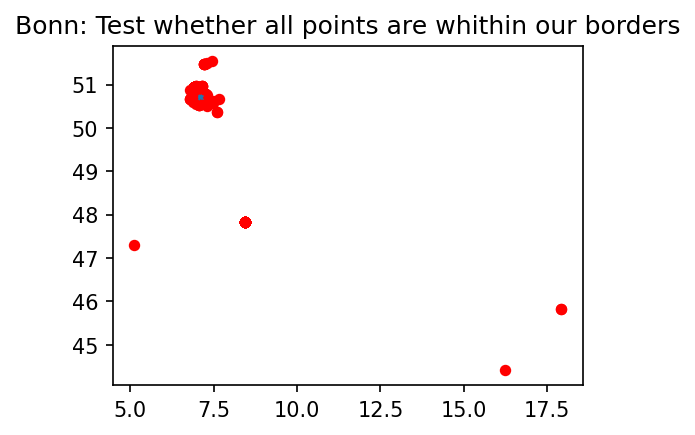

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3), dpi=150)

gdf_bonn.plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "Neg")

city_bounding_box.plot(
    ax=ax)

ax.set(
    title='Bonn: Test whether all trips start whithin the borders', 
    aspect=1.3
    #facecolor='lightblue'
);

In [105]:
# Check wether a trip starts within the borders of Bonn or not
gdf_bonn['Bonn'] = gdf_bonn.apply(lambda x: city_bounding_box['geometry'].contains(x['geometry']), axis=1)

In [106]:
gdf_bonn["Bonn"].value_counts()

True     1036662
False      12710
Name: Bonn, dtype: int64

In [107]:
# Filter for trips which start within the borders of Bonn
bonn_trips = gdf_bonn[gdf_bonn['Bonn'] == True]

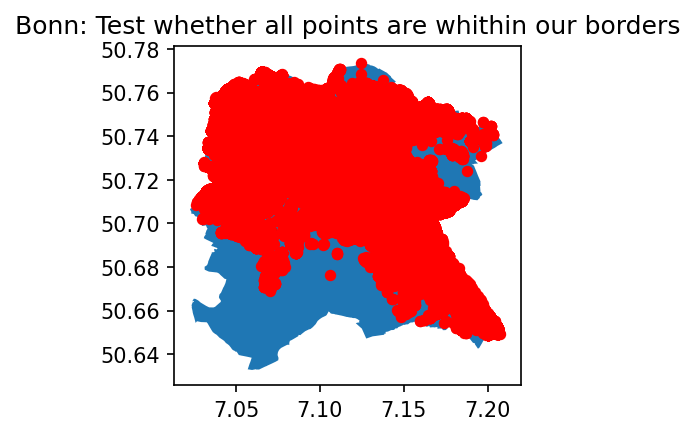

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3), dpi=150)

city_bounding_box.plot(
    ax=ax)

bonn_trips.plot(ax =ax, markersize = 20, color = "red", marker = "o", label = "Neg")

ax.set(
    title='Bonn: Test whether all trips start whithin the borders', 
    aspect=1.3
    #facecolor='lightblue'
);

In [111]:
bonn_trips.to_csv("Data/bonn_trips.csv")

## Adding Land-use data

In the following steps the land-use data which is provided by [Copernicus - Europe's eyes on Earth](https://land.copernicus.eu/pan-european/corine-land-cover/clc2018) is added. 

The open-data source is used to add several features to the trip data that describes the land cover at the start position of a trip. 

In [112]:
# this cell is commented becauce otherwise this code would take a lot of execution time 

# Reading in the polygon which represents the borders of Bonn'''
# city_bounding_box = geopandas.read_file('Data/BonnGeoJSON.geojson')

# Changing crs from epsg:4326 to espg:3035 since the land use data is in epsg:3035
# city_bounding_box = city_bounding_box.to_crs(epsg=3035)

# Reading in the land use data for entire Europe
# gdf = geopandas.read_file('Data/U2018_CLC2018_V2020_20u1.gdb',layer=0)

# Select the land use data for Bonn by checking which Multipolygon intersects with the Polygon of Bonn 
# for this a boolean column 'Bonn' is created
# gdf['Bonn'] = gdf.apply(lambda x: city_bounding_box['geometry'].intersects(x['geometry']), axis=1)

# filter for the land use data of Bonn
# land_use_bonn = gdf[gdf['Bonn']]

# saving the land use data of Bonn as a shapefile
# land_use_bonn.to_file('Data/Bonn_LandUse.shp') # this file is used below 

In [113]:
# read in land geodatabase / Data for Bonn
land_use_bonn_df = geopandas.read_file('Data/Bonn_LandUse.shp')

#changing crs: espg=3035 to crs: espg=4326
land_use_bonn_df = land_use_bonn_df.to_crs(epsg=4326)

In [114]:
land_use_bonn_df.head()

Code_18 Remark     Area_Ha         ID    Shape_Leng    Shape_Area  Bonn  \
0     111   None  154.483892  EU_536241   8976.113379  1.544839e+06     1   
1     112   None  472.949815  EU_542322  17521.059802  4.729498e+06     1   
2     112   None   99.244434  EU_542381   6952.700295  9.924443e+05     1   
3     112   None  128.511980  EU_542493   6094.591766  1.285120e+06     1   
4     112   None  248.371232  EU_542790   9538.857377  2.483712e+06     1   

                                            geometry  
0  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...  
1  POLYGON ((7.04673 50.64094, 7.04829 50.64017, ...  
2  POLYGON ((7.11141 50.65795, 7.11197 50.65779, ...  
3  POLYGON ((7.07876 50.68557, 7.07858 50.68528, ...  
4  POLYGON ((7.04029 50.75829, 7.04114 50.75776, ...

In [115]:
# this codes describe the land cover in Bonn
land_use_bonn_df["Code_18"].unique()

array(['111', '112', '121', '211', '231', '242', '243', '311', '312',
       '313', '141', '142', '222', '511'], dtype=object)

In [116]:
# just the code and geometry are needed
land_use_bonn_df = land_use_bonn_df[["Code_18", "geometry"]]

In [117]:
# Merging the land_use data with the bonn_trips by checking which polygon of the land_use data contains the start point of the trip
bonn_trips = geopandas.sjoin(land_use_bonn_df,bonn_trips, how='inner', op='contains')
bonn_trips.reset_index(drop=True, inplace=True)

In [118]:
# take a look at which land-code occurs most often
bonn_trips["Code_18"].value_counts()

112    684639
111    180556
121    141062
141     16716
211      6813
231      3121
511      1893
311      1135
313       491
242       197
243        28
312        11
Name: Code_18, dtype: int64

#### Legend of land-codes 
* 112 - Discontinuous urban fabric
* 111 - Continuous urban fabric
* 121 - Industrial or commercial units
* 141 - Green urban areas
* 211 - Non-irrigated arable land
* 231 - Pastures
* 511 - Water courses
* 311 - Broad-leaved forest
* 313 - Mixed forest
* 242 - Complex cultivation patterns
* 243 - Land principally occupied by agriculture, with significant areas of natural vegetation
* 312 - Coniferous forest
* 142 - Sport and leisure facilities

In [119]:
# visualize the differnt land covers 
m = folium.Map(location = [50.7323,7.1847],min_zoom=9,max_zoom=12, zoom_start=10)
for index, row in land_use_bonn_df.iterrows():    
    folium.Choropleth(land_use_bonn_df.iloc[index].geometry,
                      fill_color='black').add_to(m)
m

In [120]:
# create land use features
bonn_trips["urban_fabric"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="112" or x=="111" else 0) 
bonn_trips["discontinuous_urban_fabric"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="112" else 0) 
bonn_trips["continuous_urban_fabric"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="111" else 0) 
bonn_trips["industry_commercial"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="121" else 0) 
bonn_trips["green_urban_area"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="141" else 0)
bonn_trips["agricultural_area"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="211" or x=="231" else 0)
bonn_trips["forest"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="311" or x=="313" or x=="312" else 0) 
bonn_trips["water_courses"] = bonn_trips["Code_18"].apply(lambda x: 1 if x=="511" else 0)

In [121]:
bonn_trips.head()

Code_18                                           geometry  index_right  \
0     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...        59276   
1     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...       858831   
2     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...       543760   
3     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...         6851   
4     111  POLYGON ((7.10632 50.74149, 7.10697 50.73969, ...       180659   

    index  index_start  p_place_type_start       datetime_start  \
0   58886       157114                  12  2019-02-26 20:33:00   
1  856969      2100345                  12  2019-10-16 17:02:00   
2  542213      1345030                  12  2019-07-16 18:02:00   
3    7118        20759                  12  2019-01-27 07:18:00   
4  180733       479187                  12  2019-04-17 10:25:00   

   b_number_start trip_start  p_uid_start  ...        h3_hex_id  Bonn  \
0           45050      start     13007405  ...  891fa11140fffff  True   
1           44805      start     23537268  ...  891fa11140fffff  True   
2           44642      start     19127006  ...  891fa11140fffff  True   
3           44961      start     12265750  ...  891fa11140fffff  True   
4           45195      start     14583112  ...  891fa11140fffff  True   

   urban_fabric discontinuous_urban_fabric  continuous_urban_fabric  \
0             1                          0                        1   
1             1                          0                        1   
2             1                          0                        1   
3             1                          0                        1   
4             1                          0                        1   

   industry_commercial  green_urban_area  agricultural_area  forest  \
0                    0                 0                  0       0   
1                    0                 0                  0       0   
2                    0                 0                  0       0   
3                    0                 0                  0       0   
4                    0                 0                  0       0   

  water_courses  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 54 columns]

In [122]:
bonn_trips.columns

Index(['Code_18', 'geometry', 'index_right', 'index', 'index_start',
       'p_place_type_start', 'datetime_start', 'b_number_start', 'trip_start',
       'p_uid_start', 'p_bikes_x', 'latitude_start', 'longitude_start',
       'p_name_start', 'p_number_start', 'p_bike_start', 'p_spot_start',
       'index_end', 'p_place_type_end', 'datetime_end', 'b_number_end',
       'trip_end', 'p_uid_end', 'p_bikes_y', 'latitude_end', 'longitude_end',
       'p_name_end', 'p_number_end', 'p_bike_end', 'p_spot_end',
       'trip_duration', 'weekday', 'distance', 'weekend', 'day', 'month',
       'hour', 'minute', 'idle_time', 'temperature °C', 'relative_humidity',
       'precipitaion_level (mm)', 'precipitation y/n',
       'average_wind_speed (m/s)', 'h3_hex_id', 'Bonn', 'urban_fabric',
       'discontinuous_urban_fabric', 'continuous_urban_fabric',
       'industry_commercial', 'green_urban_area', 'agricultural_area',
       'forest', 'water_courses'],
      dtype='object')

In [123]:
bonn_trips.drop("geometry",axis=1,inplace=True)
bonn_trips.to_csv("Data/bonn_trips.csv")

## Adding data of the bus and train network

The website opendata.bonn.de provides data about its bus and train network. In the next steps the bus and train stations are used to calculate the distance to the closest bus/train station from the start place of a trip. 

The data can be downloaded [here.](https://opendata.bonn.de/dataset/c6dc5a54-8061-4636-9baa-5a1a58cb3704/resource/c6dc5a54-8061-4636-9baa-5a1a58cb3704)

In [2]:
# read in the stops 
# contains all stations in the area of Cologne/Bonn
stops = pd.read_csv("Data/stops.txt", index_col=0)

# filter on the stations in Bonn 
stops = stops[stops["stop_name"].apply(lambda x: x.find("Bonn")==0)][["stop_name","stop_lat","stop_lon"]].reset_index(drop=True)


In [3]:
bonn_trips = pd.read_csv("Data/bonn_trips.csv", index_col=0)

In [74]:
stops.head()

stop_name   stop_lat  stop_lon
0                      Bonn Propsthof Nord  50.739096  7.073507
1                    Bonn Bad Godesberg Bf  50.683719  7.159817
2            Bonn Bad Godesberg Stadthalle  50.680336  7.158347
3                       Bonn Museum Koenig  50.721748  7.114519
4  Bonn Bundesrechnungshof/Auswärtiges Amt  50.725560  7.111579

In [ ]:
# Visualizing the bus and train stations
m = folium.Map(location = [50.7323,7.1847],min_zoom=9,max_zoom=13, zoom_start=11)
for index, stop in stops.iterrows():
    folium.CircleMarker([stop["stop_lat"],stop["stop_lon"]],
                        radius=1,
                        color="#3db7e4",
                        popup=stop['stop_name'],
                        fill=False).add_to(m)

m

In [7]:
#bonn_trips_sample = bonn_trips.sample(10)
# this takes a while 
# comment after the first run 
results = []
for i,trip in bonn_trips.iterrows(): 
    result = 1000
    for j, stop in stops.iterrows():             
        distance = vincenty([trip["latitude_start"],trip["longitude_start"]],[stop["stop_lat"],stop["stop_lon"]])     
        if distance < result: 
            result = distance
    results.append(result)
bonn_trips["distance_next_station"] = results  # add to trip data

In [8]:
bonn_trips

Code_18  index_right  index_start  p_place_type_start  \
47570        111        95559       254125                  12   
806665       112       211946       560139                   0   
1028131      121       954114      2345446                  12   
301965       121       455881      1145685                  12   
989458       112       941217      2305999                  12   
1011938      112       385360       984502                  12   
506695       112       589838      1452977                  12   
887283       112       138502       370699                  12   
78979        111         9562        28666                  12   
437525       111       240048       630147                  12   

              datetime_start  b_number_start trip_start  p_uid_start  \
47570    2019-03-13 14:54:00           44844      start     13367196   
806665   2019-04-26 14:35:00           45321      start     10044769   
1028131  2019-11-22 15:53:00           45424      start     25157500   
301965   2019-06-28 19:36:00           45111      start     18266163   
989458   2019-11-15 21:49:00           45301      start     24900374   
1011938  2019-06-12 05:32:00           44567      start     17169808   
506695   2019-07-29 20:42:00           44712      start     19749302   
887283   2019-04-05 07:12:00           44726      start     14079148   
78979    2019-01-30 21:44:00           44998      start     12353686   
437525   2019-05-04 22:33:00           44602      start     15346804   

         p_bikes_x  latitude_start  ...        h3_hex_id urban_fabric  \
47570            1       50.737102  ...  891fa11144bffff            1   
806665           1       50.714640  ...  891fa111237ffff            1   
1028131          1       50.714240  ...  891fa1113cbffff            0   
301965           1       50.724502  ...  891fa111677ffff            0   
989458           1       50.752262  ...  891fa111513ffff            1   
1011938          1       50.733147  ...  891fa111017ffff            1   
506695           1       50.693280  ...  891fa11ad4fffff            1   
887283           1       50.747502  ...  891fa111577ffff            1   
78979            1       50.735849  ...  891fa11146bffff            1   
437525           1       50.740804  ...  891fa1110b7ffff            1   

         discontinuous_urban_fabric  continuous_urban_fabric  \
47570                             0                        1   
806665                            1                        0   
1028131                           0                        0   
301965                            0                        0   
989458                            1                        0   
1011938                           1                        0   
506695                            1                        0   
887283                            1                        0   
78979                             0                        1   
437525                            0                        1   

         industry_commercial  green_urban_area  agricultural_area forest  \
47570                      0                 0                  0      0   
806665                     0                 0                  0      0   
1028131                    1                 0                  0      0   
301965                     1                 0                  0      0   
989458                     0                 0                  0      0   
1011938                    0                 0                  0      0   
506695                     0                 0                  0      0   
887283                     0                 0                  0      0   
78979                      0                 0                  0      0   
437525                     0                 0                  0      0   

         water_courses distance_next_station  
47570                0              0.114859  
806665               0              0.028026  
10

In [ ]:
bonn_trips.to_csv("Data/bonn_trips.csv")